In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

The Madelon dataset is a synthetic dataset that was generated for a machine learning competition. It is a high-dimensional dataset, with 500 features and 2,600 data points. It has a highly non-linear structure, and in this homework assignment, you’ll be diving into it further with PCA and k-means clustering. When you are asked to generate a plot, please provide the image in your final writeup along with a brief analysis of its major features.

# Before performing any dimensionality reduction, write a program to use k-means clustering on the Madelon dataset. Try the following k values: 4, 8, 16, 32, 64. 

In [3]:
madelon = pd.read_csv('/Users/mario/Desktop/UCD-MSBA/Winter/452/HW5/madelon.csv')
madelon = madelon.drop('Unnamed: 0',axis=1)
madelon.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,485,477,537,479,452,471,491,476,475,473,...,477,481,477,485,511,485,481,479,475,496
1,483,458,460,487,587,475,526,479,485,469,...,463,478,487,338,513,486,483,492,510,517
2,487,542,499,468,448,471,442,478,480,477,...,487,481,492,650,506,501,480,489,499,498
3,480,491,510,485,495,472,417,474,502,476,...,491,480,474,572,454,469,475,482,494,461
4,484,502,528,489,466,481,402,478,487,468,...,488,479,452,435,486,508,481,504,495,511


In [4]:
# Standardize the dataset
scaler = StandardScaler()
madelon_std = pd.DataFrame(scaler.fit_transform(madelon), columns=madelon.columns)
madelon_std.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,0.516136,-0.215974,0.713077,-0.488131,-1.183243,-1.211192,0.260055,-0.409390,-0.786691,-0.794660,...,-0.251994,0.544491,-0.390690,-0.099933,0.492812,-0.682645,0.485992,-0.305568,-0.903116,0.208779
1,0.199264,-0.842352,-1.271907,0.406575,2.081658,-0.631114,1.125953,1.746751,-0.131996,-1.342085,...,-0.923340,-0.199167,0.031642,-1.253498,0.550157,-0.656116,0.827177,0.649950,0.042229,1.018908
2,0.833009,1.926899,-0.266525,-1.718352,-1.279981,-1.211192,-0.952203,1.028037,-0.459344,-0.247236,...,0.227538,0.544491,0.242809,1.194884,0.349450,-0.258173,0.315399,0.429446,-0.254880,0.285934
3,-0.276045,0.245568,0.017044,0.182899,-0.143311,-1.066172,-1.570702,-1.846818,0.980984,-0.384092,...,0.419351,0.296605,-0.517390,0.582789,-1.141514,-1.107118,-0.537563,-0.085064,-0.389929,-1.141436
4,0.357700,0.608208,0.481066,0.630252,-0.844661,0.239003,-1.941801,1.028037,-0.001058,-1.478941,...,0.275491,0.048719,-1.446521,-0.492302,-0.223998,-0.072466,0.485992,1.531967,-0.362919,0.787442


In [5]:
# Get summary of dataset
summary = madelon_std.describe()

# Print summary
print(summary)

                 V1            V2            V3            V4            V5  \
count  2.600000e+03  2.600000e+03  2.600000e+03  2.600000e+03  2.600000e+03   
mean   2.787514e-16 -1.988153e-16  5.014792e-16  8.936441e-16  2.657703e-16   
std    1.000192e+00  1.000192e+00  1.000192e+00  1.000192e+00  1.000192e+00   
min   -3.127895e+00 -3.512700e+00 -3.592018e+00 -3.395926e+00 -3.408213e+00   
25%   -5.929168e-01 -6.445481e-01 -6.532104e-01 -7.118075e-01 -6.511850e-01   
50%    4.082778e-02  1.479723e-02 -8.735119e-03 -4.077795e-02 -2.238922e-02   
75%    6.745724e-01  6.741425e-01  6.615192e-01  6.302516e-01  6.305911e-01   
max    3.367987e+00  4.168673e+00  3.729221e+00  3.985399e+00  4.524288e+00   

                 V6            V7            V8            V9           V10  \
count  2.600000e+03  2.600000e+03  2.600000e+03  2.600000e+03  2.600000e+03   
mean   7.679327e-16  6.695499e-17  1.721973e-14  1.243450e-15 -2.531992e-15   
std    1.000192e+00  1.000192e+00  1.000192e+00  1.

It seems like many columns have outliers, which may influence the final results. To decrease the influence of outliers, I decide to replace them with medians.

In [6]:
# Replace values with absolute values > 3 with column medians
medians = madelon_std.median()
madelon_std = np.where(abs(madelon_std) > 3, medians, madelon_std)

# Create new pandas DataFrame with modified values
madelon_std = pd.DataFrame(madelon_std, columns=madelon.columns)

# Print modified dataset
madelon_std.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,0.516136,-0.215974,0.713077,-0.488131,-1.183243,-1.211192,0.260055,-0.409390,-0.786691,-0.794660,...,-0.251994,0.544491,-0.390690,-0.099933,0.492812,-0.682645,0.485992,-0.305568,-0.903116,0.208779
1,0.199264,-0.842352,-1.271907,0.406575,2.081658,-0.631114,1.125953,1.746751,-0.131996,-1.342085,...,-0.923340,-0.199167,0.031642,-1.253498,0.550157,-0.656116,0.827177,0.649950,0.042229,1.018908
2,0.833009,1.926899,-0.266525,-1.718352,-1.279981,-1.211192,-0.952203,1.028037,-0.459344,-0.247236,...,0.227538,0.544491,0.242809,1.194884,0.349450,-0.258173,0.315399,0.429446,-0.254880,0.285934
3,-0.276045,0.245568,0.017044,0.182899,-0.143311,-1.066172,-1.570702,-1.846818,0.980984,-0.384092,...,0.419351,0.296605,-0.517390,0.582789,-1.141514,-1.107118,-0.537563,-0.085064,-0.389929,-1.141436
4,0.357700,0.608208,0.481066,0.630252,-0.844661,0.239003,-1.941801,1.028037,-0.001058,-1.478941,...,0.275491,0.048719,-1.446521,-0.492302,-0.223998,-0.072466,0.485992,1.531967,-0.362919,0.787442


In [7]:
# define the list of k values to try
k_values = [4, 8, 16, 32, 64]

# run k-means clustering for each value of k
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(madelon_std)
    inertias.append(kmeans.inertia_)

# 1. What preprocessing techniques did you apply, if any?

Before processing the dataset using k-means, I decide to standardize the dataset first because scaling can really affect the result of K-means. Since K-means will compare the distance of data points and their center, if the scale of some data points are much larger than others, then the calculated distance will not be reliable. After standardizing the dataset, the center mean of each cluster can then be interpreted as standard deviations from marginal average.

# 2. Describe qualitatively: how does the number of clusters affect the performance of the clustering algorithm on the dataset? 

Based on the Elbow Curve, the larger the number of clusters, the lower the inertia, and the better the performance of the clustering algorithm will be.

# 3. Generate a plot of the number of clusters k (x-axis) versus the sum of squared distance (SSE) between data points and their assigned centroids (y-axis). What appears to be the optimal k from the list of values you used, and why? 

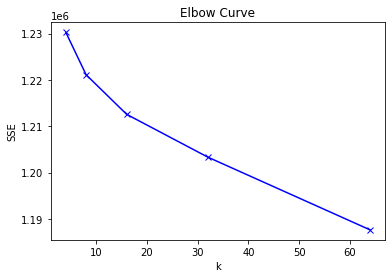

In [8]:
# plot the elbow curve to find the best k value
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Curve')
plt.show()

Based on the plot, the curve seems to become not too steep when k is larger than 16. As a result, based on the elbow rule, since more clusters cannot improve the SSE a lot, I would choose 16 as the optimal k.

# 4. For k = 8, how did you initialize the set of cluster centroids before running k-means? Rerun k-means again, this time ensuring that the centroids are all different. Does this – and if so, to what extent – affect the final clusters created?

In scikit-learn's KMeans class, the initialization of the cluster centroids is performed randomly by default. Specifically, it uses the k-means++ initialization method, which is a smart initialization technique that tries to spread the initial cluster centers evenly across the data space.

In [9]:
kmeans = KMeans(n_clusters=8, random_state=42)
y_pred = kmeans.fit_predict(madelon_std)
SSE_1 = kmeans.inertia_
print("SSE of the original model:", SSE_1)

SSE of the original model: 1221125.633345351


In [10]:
# Rerun k-means, ensuring that the centroids are all different
k = 8
kmeans_1 = KMeans(n_clusters=k, init='random', random_state=42)
y_pred_1 = kmeans_1.fit_predict(madelon_std)
SSE_2 = kmeans_1.inertia_
print("SSE of the random model:", SSE_2)

SSE of the random model: 1220806.8422987566


Based on the results, in this case, choosing different centroids and starting points seems not to influence the SSE of the model significantly.

# 5. More generally for any dataset, what evaluation metrics can be used to assess the quality of the clusters produced?

For evaluation metrics, first we can always refer to SSE(sum of squared srror), which is also known as inertia. Inertia measures the sum of squared distances of samples to their closest cluster center. A lower inertia indicates better clustering performance.

Also, we can refer to Silhouette Score: Silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, with higher values indicating better clustering performance.

Besides, Calinski-Harabasz Index may also be a good choice. Calinski-Harabasz index measures the ratio of between-cluster variance to within-cluster variance. Higher values indicate better clustering performance.

# The Madelon dataset is high-dimensional, with 500 features per data point. Some of these features might be redundant or noisy, making clustering more difficult. 

1. Fit the standardized data with PCA. Then, create a cumulative variance plot – showing the number of components included (x-axis) versus the amount of variance captured (y-axis). Generally, we want to retain at least 75% of the variance. How many components would you decide to keep?

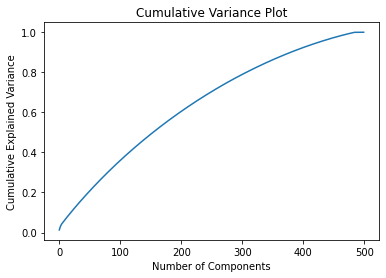

In [11]:
pca = PCA().fit(madelon_std)
# create a cumulative variance plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Plot')
plt.show()

In [12]:
# Calculate cumulative sum of explained variance ratios
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine number of components required to retain at least 75% of variance
n_components = np.argmax(cumulative_variance >= 0.75) + 1

print("Number of components to retain 75% of variance:", n_components)

Number of components to retain 75% of variance: 277


As a result, I will choose to keep 277 components.

2. Perform PCA with your selected principal components.
2.1 Plot the transformed data on a graph with the first two principal components as the axes i.e. x = PC 1, y = PC 2.

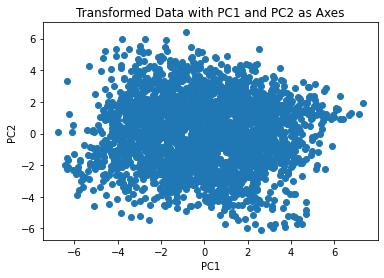

In [13]:
# Fit PCA on the standardized data and transform it
pca = PCA(n_components=277)
pca_val = pca.fit_transform(madelon_std)

# Plot the transformed data with PC1 as the x-axis and PC2 as the y-axis
plt.scatter(pca_val[:, 0], pca_val[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Transformed Data with PC1 and PC2 as Axes')
plt.show()

2.2 Plot the original data on a graph with the two original variables that have the highest absolute combined loading for PC 1 and PC 2 i.e. maximizing |loading PC1| + |loading PC2|.

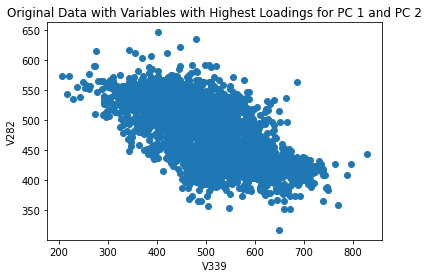

In [14]:
# Find the two original variables with highest absolute combined loading for PC 1 and PC 2
pc1_loading = np.abs(pca.components_[0])
pc2_loading = np.abs(pca.components_[1])
var1_idx = np.argmax(pc1_loading + pc2_loading)
pc1_loading[var1_idx] = 0
var2_idx = np.argmax(pc1_loading + pc2_loading)

# Plot the original data on a graph with the two original variables that have the highest absolute combined loading for PC 1 and PC 2
plt.scatter(madelon.iloc[:, var1_idx], madelon.iloc[:, var2_idx])
plt.xlabel(madelon.columns[var1_idx])
plt.ylabel(madelon.columns[var2_idx])
plt.title('Original Data with Variables with Highest Loadings for PC 1 and PC 2')
plt.show()

3. Examine the scatter plot of PC 1 (x-axis) versus PC 2 (y-axis) for all data points that you created in the previous part. Qualitatively, can you identify visible clusters? Why or why not might this be the case with this particular dataset?

Based on the results shown before, I cannot identify visible clusters.
This may be because there are too many variables in this dataset and only two dimensions cannot show clear clusters.
There may be other principal components that are necessary to effectively capture the variance and structure of the data.
Also, the reason may be because this dataset inherently does not have clusters, so we cannot see clear clusters after PCA.

# Now, we will run k-means clustering on the transformed data from the previous problem.

1. Why is it a good idea to do this, especially for high-dimensional datasets? Name a number of reasons.

First, it can help reduce dimensionalities. After reducing the dimensions, it will be easier for clustering functions to find the patterns in the dataset and make the results more atable for K means. Also, it can help improve multicolinearity problems and make the results more reasonable.

Also, it can speed up the process of K means. Since less dimensions are included in the dataset, and K means will try multiple times to reassign vairables, less dimensions can make it faster for the proccess of clustering.

Lastlt, it can help improve accuracy. By reducing the dimensionality of the dataset, PCA can help remove noise and irrelevant features, making the clustering process more accurate and effective.

2. Use the same k values again (4, 8, 16, 32, 64) to again generate an elbow plot. 

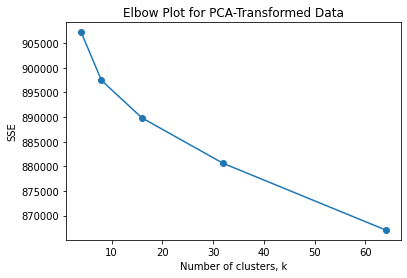

In [15]:
inertias_pca = []
for k in [4, 8, 16, 32, 64]:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(pca_val)
    inertias_pca.append(kmeans_pca.inertia_)

plt.plot([4, 8, 16, 32, 64], inertias_pca, 'o-')
plt.xlabel('Number of clusters, k')
plt.ylabel('SSE')
plt.title('Elbow Plot for PCA-Transformed Data')
plt.show()

What is the optimal k? Is it different from the one you found in (1)?

The optimal k may still be 16 since the curve becomes less steep after 16. It is not different with my finding in (1).

Compare the SSE values plotted in this exercise to the previous plot you generated in (1c) before performing PCA.

The SSE values are smaller than the previous plot I generated in (1c). It may be because I reduce the dimensions, and part of the information is lost, which decreases the distance between data points and their centers. As a result, PCA improves the performance of Kmeans.

3. Again, create a scatter plot of PC 1 (x-axis) versus PC 2 (y-axis) for all of the transformed data points. Label the cluster centers and color-code by cluster assignment for the first 5 iterations of k = 32. Can you see the algorithm begin to converge to optimal assignments?

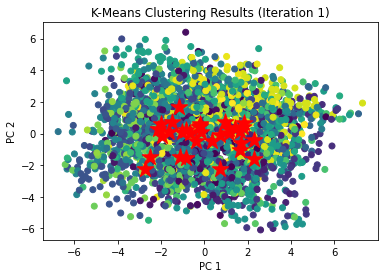

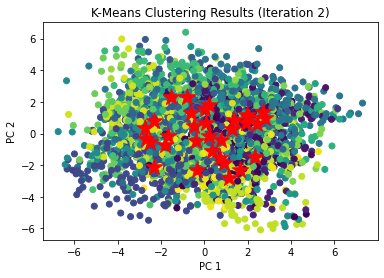

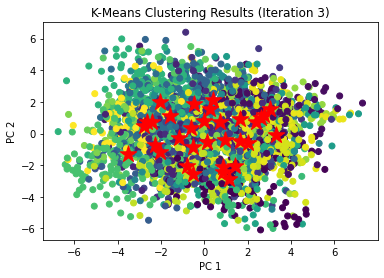

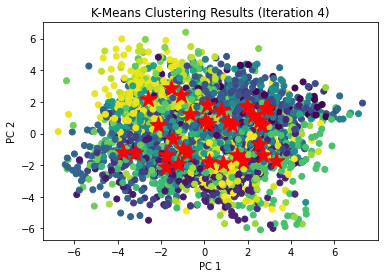

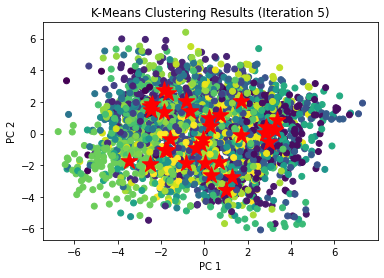

In [17]:
# Perform PCA
pca = PCA(n_components=277)
pca_val = pca.fit_transform(madelon_std)

# Define the number of clusters and iterations
n_clusters = 32
n_iter = 5

# Loop over the first 5 iterations
for i in range(n_iter):
    # Fit k-means on PCA-transformed data
    kmeans = KMeans(n_clusters=n_clusters, max_iter=i+1)
    kmeans.fit(pca_val)

    # Create a scatter plot of PC 1 versus PC 2 with color-coded clusters
    plt.scatter(pca_val[:, 0], pca_val[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='r', label='Cluster center')

    # Set the plot title and axis labels
    plt.title(f'K-Means Clustering Results (Iteration {i+1})')
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')

    # Show the plot
    plt.show()

Based on my plots, after 5 iterations, the data points are stable and they seem to converge to optimal assignments.